# VGG

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.metrics import categorical_accuracy, Precision, Recall, F1Score

data_dir = f"{os.getcwd()}/Celebrity Faces Dataset"
img_width, img_height = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([base_model,
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(17, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[categorical_accuracy, Precision(), Recall()])

Found 1350 images belonging to 17 classes.
Found 450 images belonging to 17 classes.


In [2]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/5
42/42 [==============================] - 178s 4s/step - loss: 3.9622 - categorical_accuracy: 0.1707 - precision: 0.1728 - recall: 0.0250 - val_loss: 2.0254 - val_categorical_accuracy: 0.3705 - val_precision: 1.0000 - val_recall: 0.0246
Epoch 2/5
42/42 [==============================] - 177s 4s/step - loss: 1.3801 - categorical_accuracy: 0.6229 - precision: 0.9148 - recall: 0.2200 - val_loss: 1.6083 - val_categorical_accuracy: 0.4710 - val_precision: 0.7770 - val_recall: 0.2411
Epoch 3/5
42/42 [==============================] - 173s 4s/step - loss: 0.7754 - categorical_accuracy: 0.8278 - precision: 0.9696 - recall: 0.5569 - val_loss: 1.3405 - val_categorical_accuracy: 0.5625 - val_precision: 0.8000 - val_recall: 0.3214
Epoch 4/5
42/42 [==============================] - 174s 4s/step - loss: 0.4155 - categorical_accuracy: 0.9545 - precision: 0.9954 - recall: 0.8209 - val_loss: 1.1272 - val_categorical_accuracy: 0.6384 - val_precision: 0.8051 - val_recall: 0.4241
Epoch 5/5
42/42 

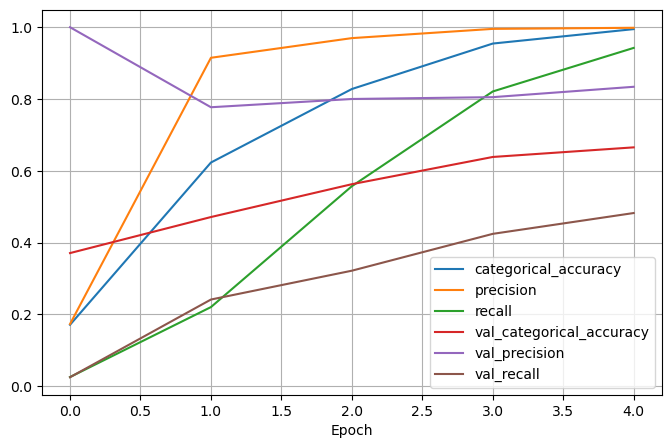

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(history.history).drop(["loss", "val_loss"], axis=1)
metrics_df.plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.grid(True)
plt.show()

In [4]:
loss, accuracy, precision, recall = model.evaluate(test_generator)

15/15 [==============================] - 44s 3s/step - loss: 1.0284 - categorical_accuracy: 0.6644 - precision: 0.8346 - recall: 0.4822


In [5]:
import numpy as np

print("Validation Accuracy:", np.round(accuracy, 2))
print("Validation Precision:", np.round(precision, 2))
print("Validation Recall:", np.round(recall, 2))

f1_score = (2*precision*recall)/(precision+recall)
print("Validation F\N{SUBSCRIPT ONE} Score:", np.round(f1_score, 2))

Validation Accuracy: 0.66
Validation Precision: 0.83
Validation Recall: 0.48
Validation F₁ Score: 0.61
